<a href="https://colab.research.google.com/github/nosedhd/Modelos-1/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# 1. Subir kaggle.json
from google.colab import files
files.upload()

# 2. Crear la carpeta y mover kaggle.json
import os
import shutil

kaggle_path = "/root/.kaggle"
os.makedirs(kaggle_path, exist_ok=True)
shutil.move("kaggle.json", os.path.join(kaggle_path, "kaggle.json"))

# 3. Cambiar permisos
os.chmod(os.path.join(kaggle_path, "kaggle.json"), 0o600)

# 4. Verificar que exista
!ls -l /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
-rw------- 1 root root 74 May 25 21:14 /root/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia/

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.09GB/s]


In [ ]:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia/

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia/.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
sns.set(style='whitegrid')
train = pd.read_csv('train.csv')

In [ ]:
print(train.columns)

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')


In [ ]:
!pip install rlxutils

  Preparing metadata (setup.py) ... done
  Created wheel for rlxutils: filename=rlxutils-0.1.10-py3-none-any.whl size=11100 sha256=a17bfe464b825e92c32d181b76fd5d29ad4577402b9f4b6fd6539afb2da385ab
  Stored in directory: /root/.cache/pip/wheels/1d/99/c0/f49a3db4e38f121da6a422c352a7ff70baf2cc21c25b851a6c
Successfully built rlxutils


# Data Cleaning



In [ ]:

columnas_redundantes = ['FAMI_TIENEINTERNET.1']

# Eliminación de las columnas redundantes del DataFrame
df = df.drop(columnas_redundantes, axis=1)

# Nombre de la columna irrelevante que se eliminará
columna_privado_libertad = 'ESTU_PRIVADO_LIBERTAD'

# Eliminación de la columna irrelevante
df = df.drop(columna_privado_libertad, axis=1)

# Importación de la librería pandas
import pandas as pd

# Lista de columnas con respuestas tipo "Sí"/"No" que se convertirán a booleanos
columnas_booleanas = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
                      'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR']

# Se imprime cuáles son los valores únicos presentes en cada columna booleana
for columna in columnas_booleanas:
    print(f"Valores únicos en la columna '{columna}': {df[columna].unique()}")

# Se convierte el texto 'Si' a True y 'No' a False en las columnas booleanas
for columna in columnas_booleanas:
    df[columna] = df[columna].map({'Si': True, 'No': False})

# Se elimina el prefijo "Estrato " en la columna de estrato socioeconómico para quedarse solo con el número
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].str.replace('Estrato ', '')

# Se imprime una muestra de los primeros 10 valores procesados
print(df['FAMI_ESTRATOVIVIENDA'].head(10))

# -------------------------
# Codificación One-Hot para columna de valor de matrícula
# -------------------------

# Se generan variables dummy (una por cada valor distinto) para la columna
encoded_df = pd.get_dummies(df['ESTU_VALORMATRICULAUNIVERSIDAD'])

# Se añaden las nuevas columnas codificadas al DataFrame original
df = pd.concat([df, encoded_df], axis=1)

# Se elimina la columna original que fue codificada
df.drop('ESTU_VALORMATRICULAUNIVERSIDAD', axis=1, inplace=True)

# Se imprime el DataFrame actualizado
print(df)

# -------------------------
# Codificación One-Hot para columna de horas semanales de trabajo
# -------------------------

# Se genera codificación one-hot con un prefijo personalizado
encoded_df = pd.get_dummies(df['ESTU_HORASSEMANATRABAJA'], prefix='Horas_Trabajo')

# Se concatena al DataFrame principal
df = pd.concat([df, encoded_df], axis=1)

# Se elimina la columna original ya codificada
df.drop('ESTU_HORASSEMANATRABAJA', axis=1, inplace=True)

# -------------------------
# Codificación ordinal para variable objetivo
# -------------------------

# Se crea un diccionario de mapeo para convertir la variable de rendimiento a valores numéricos ordenados
mapeo_rangos = {'bajo': 1, 'medio-bajo': 2, 'medio-alto': 3, 'alto': 4}
df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].map(mapeo_rangos)

# -------------------------
# Limpieza y normalización de texto en programa académico
# -------------------------

# Convertir a minúsculas para homogeneizar los textos
df['ESTU_PRGM_ACADEMICO'] = df['ESTU_PRGM_ACADEMICO'].str.lower()

# Eliminar acentos y caracteres especiales usando normalización unicode
df['ESTU_PRGM_ACADEMICO'] = df['ESTU_PRGM_ACADEMICO'].str.normalize('NFKD')\
                                                           .str.encode('ascii', errors='ignore')\
                                                           .str.decode('utf-8')

# Mostrar algunos ejemplos del resultado de la normalización
print(df['ESTU_PRGM_ACADEMICO'].head())

# -------------------------
# Imputación de valores faltantes con la moda
# -------------------------

# Volvemos a definir la lista de columnas booleanas (por claridad)
columnas_booleanas = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
                      'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR']

# Se rellenan los valores faltantes en estas columnas con el valor más frecuente (moda)
for columna in columnas_booleanas:
    moda = df[columna].mode()[0]
    df[columna].fillna(moda, inplace=True)

# Se rellena con la moda también la columna de estrato socioeconómico
moda_estrato = df['FAMI_ESTRATOVIVIENDA'].mode()[0]
df['FAMI_ESTRATOVIVIENDA'].fillna(moda_estrato, inplace=True)


Valores únicos en la columna 'FAMI_TIENEINTERNET': ['Si' 'No' nan]
Valores únicos en la columna 'FAMI_TIENELAVADORA': ['Si' 'No' nan]
Valores únicos en la columna 'FAMI_TIENEAUTOMOVIL': ['Si' 'No' nan]
Valores únicos en la columna 'ESTU_PAGOMATRICULAPROPIO': ['No' 'Si' nan]
Valores únicos en la columna 'FAMI_TIENECOMPUTADOR': ['Si' 'No' nan]
0    3
1    3
2    3
3    4
4    3
5    5
6    2
7    2
8    1
9    5
Name: FAMI_ESTRATOVIVIENDA, dtype: object
            ID  PERIODO                  ESTU_PRGM_ACADEMICO  \
0       904256    20212                           ENFERMERIA   
1       645256    20212                              DERECHO   
2       308367    20203                MERCADEO Y PUBLICIDAD   
3       470353    20195           ADMINISTRACION DE EMPRESAS   
4       989032    20212                           PSICOLOGIA   
...        ...      ...                                  ...   
692495   25096    20195                             BIOLOGIA   
692496  754213    20212         

<ipython-input-7-fa09f183ea3e>:97: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(moda, inplace=True)
<ipython-input-7-fa09f183ea3e>:97: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columna].fillna(moda, inplace=True)
<ipython-input-7-fa09f183ea3e>:101: FutureWarning: A value is trying to 

In [ ]:
print(df.columns)

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO',
       'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones',
       'Entre 5.5 millones y menos de 7 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'Más de 7 millones', 'No pagó matrícula', 'Horas_Trabajo_0',
       'Horas_Trabajo_Entre 11 y 20 horas',
       'Horas_Trabajo_Entre 21 y 30 horas', 'Horas_Trabajo_Menos de 10 horas',
       'Horas_Trabajo_Más de 30 horas'],
      dtype='object')


Generating plots for: PERIODO


<Figure size 1600x900 with 0 Axes>

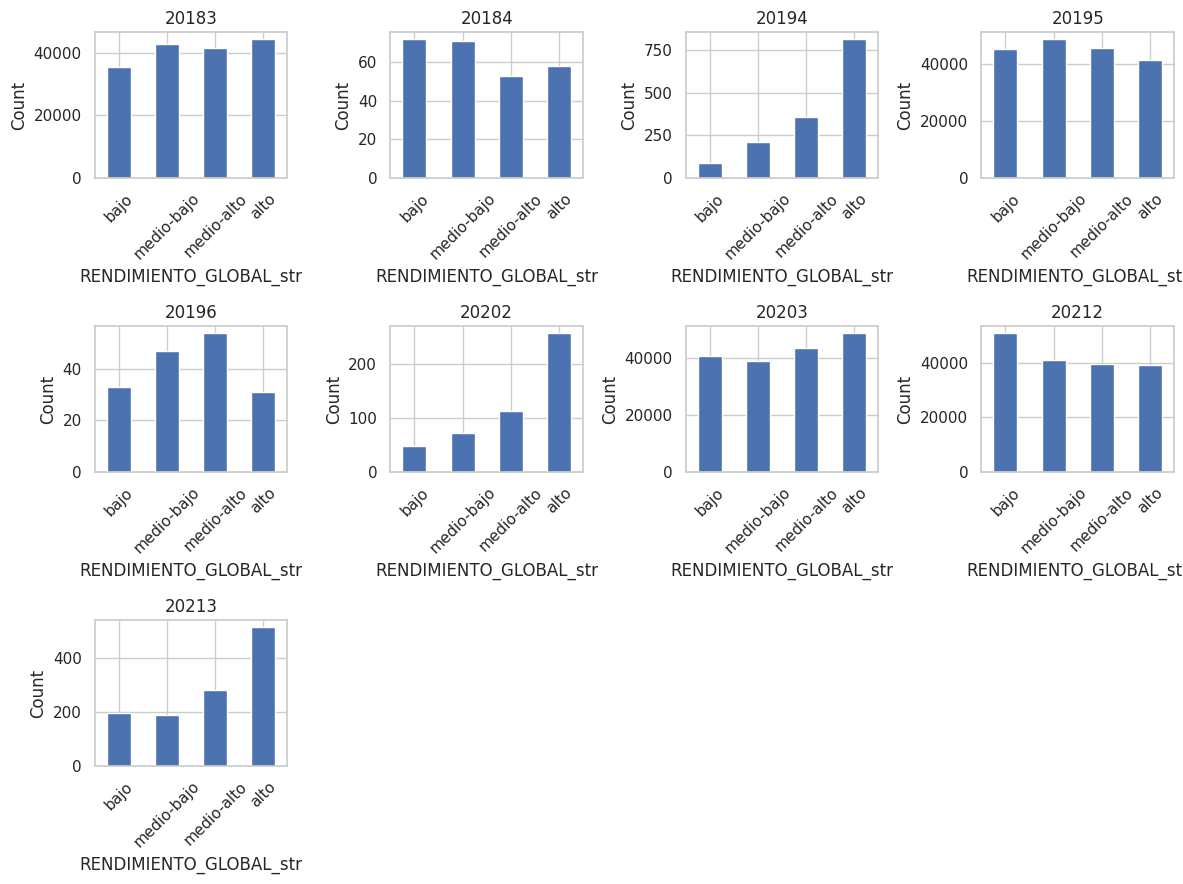

Generating plots for: ESTU_PRGM_DEPARTAMENTO


<Figure size 1600x2400 with 0 Axes>

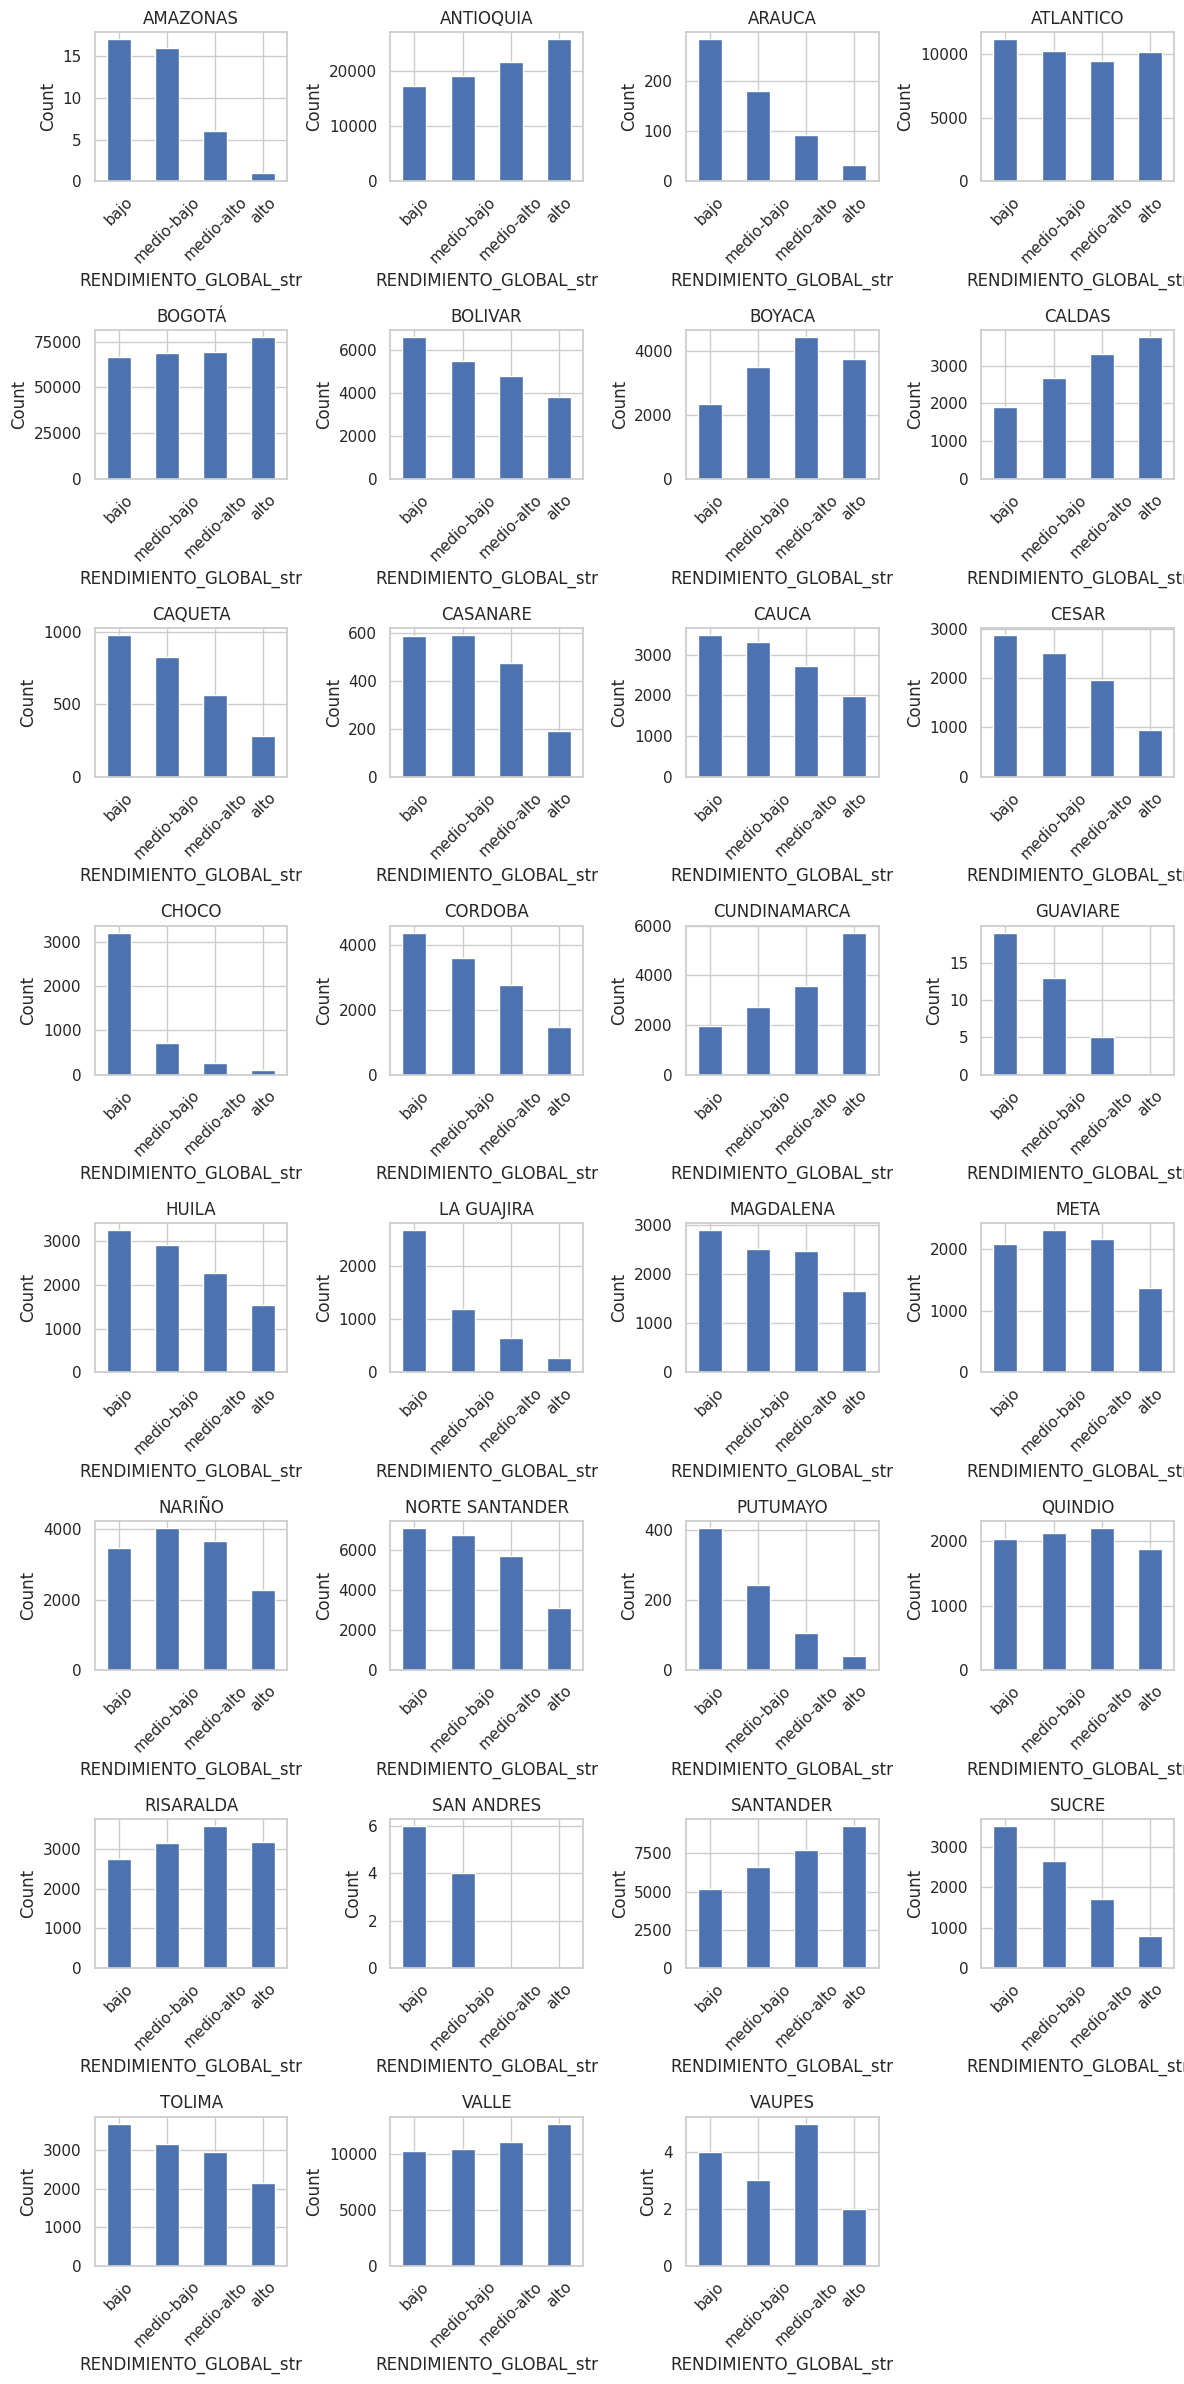

Generating plots for: FAMI_ESTRATOVIVIENDA


<Figure size 1600x600 with 0 Axes>

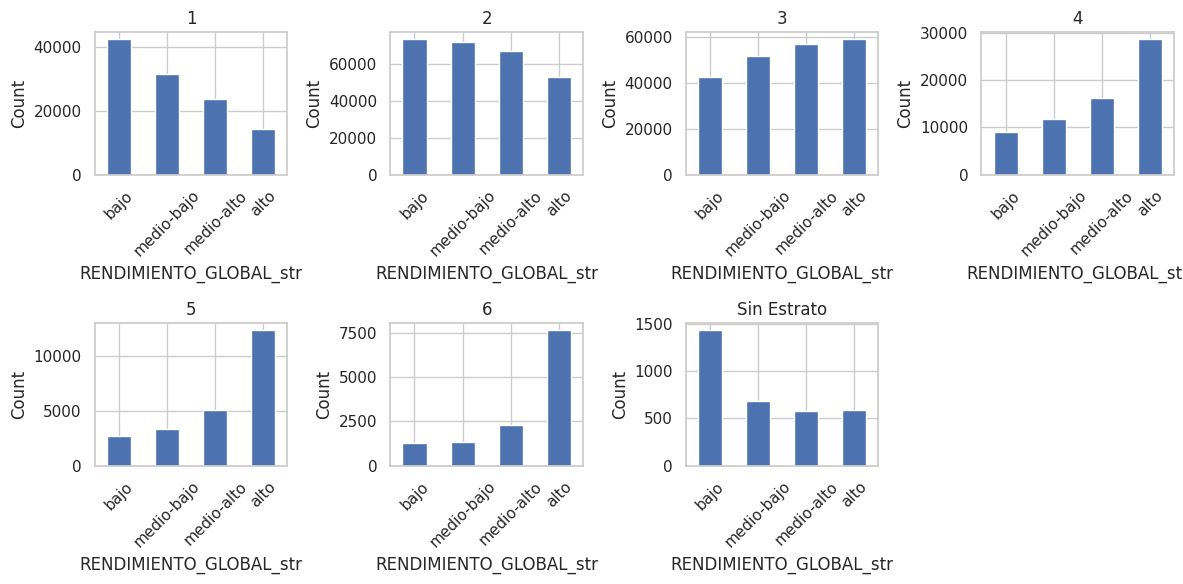

Generating plots for: FAMI_TIENEINTERNET


<Figure size 800x300 with 0 Axes>

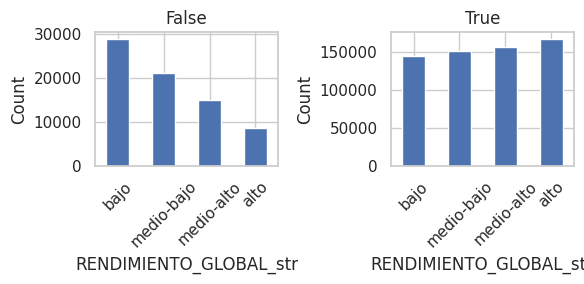

Generating plots for: FAMI_EDUCACIONPADRE


<Figure size 1600x1200 with 0 Axes>

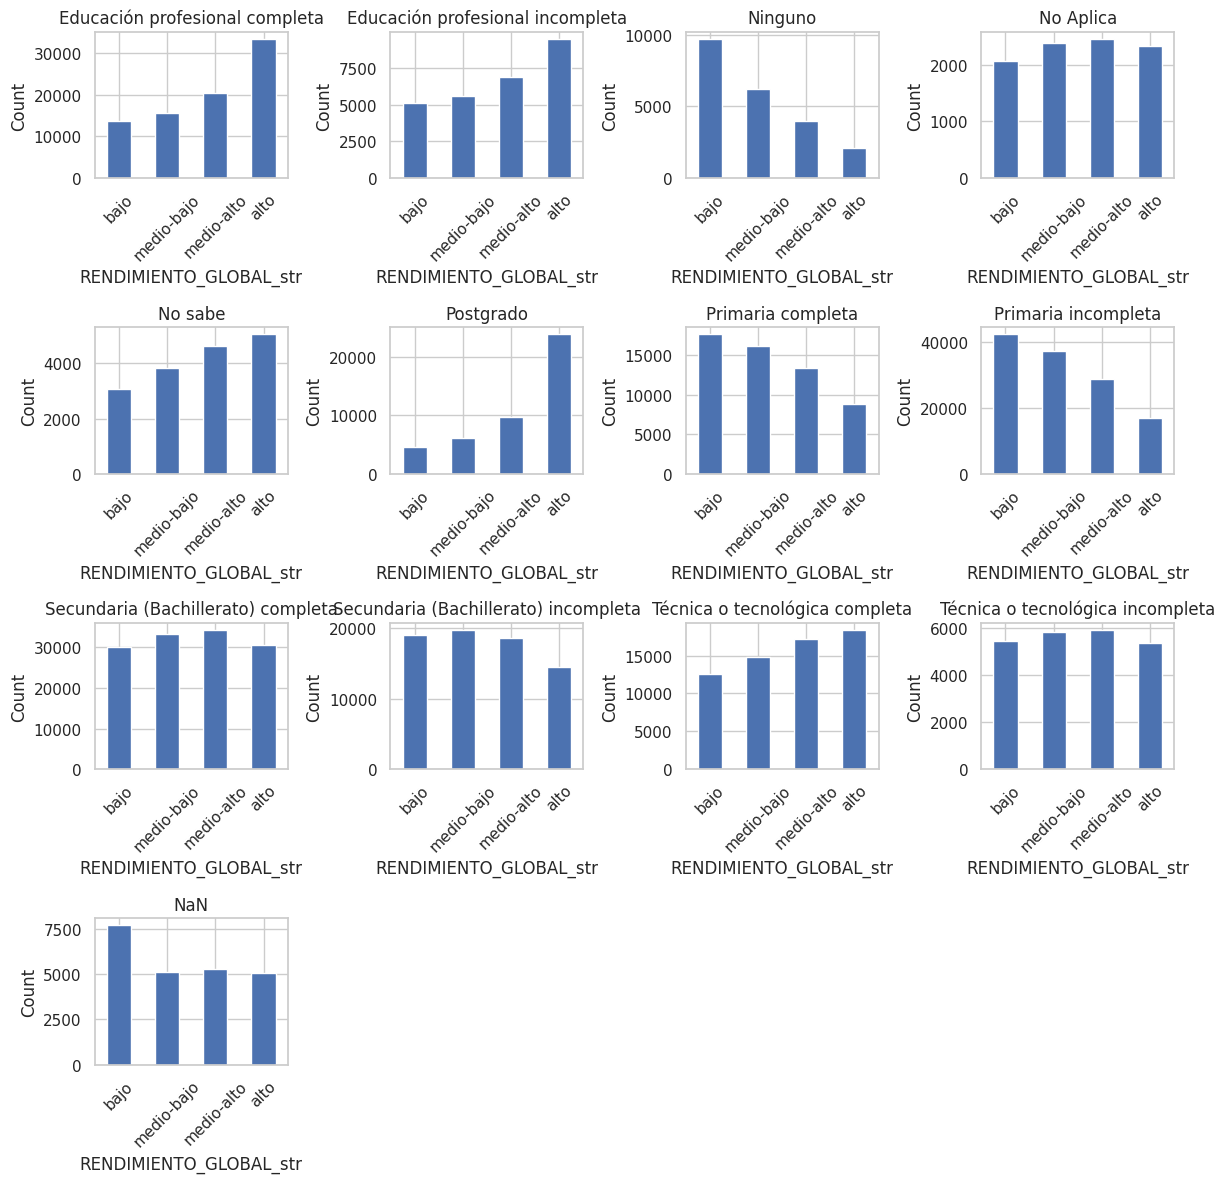

Generating plots for: FAMI_TIENELAVADORA


<Figure size 800x300 with 0 Axes>

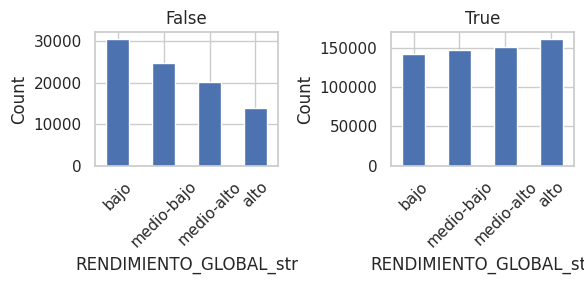

Generating plots for: FAMI_TIENEAUTOMOVIL


<Figure size 800x300 with 0 Axes>

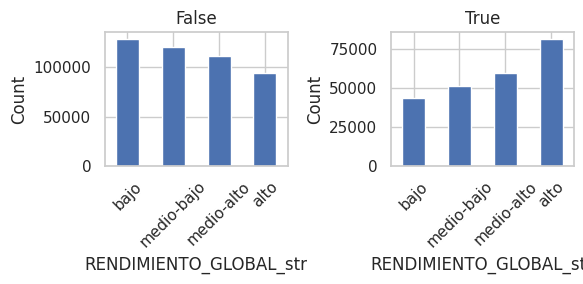

Generating plots for: ESTU_PAGOMATRICULAPROPIO


<Figure size 800x300 with 0 Axes>

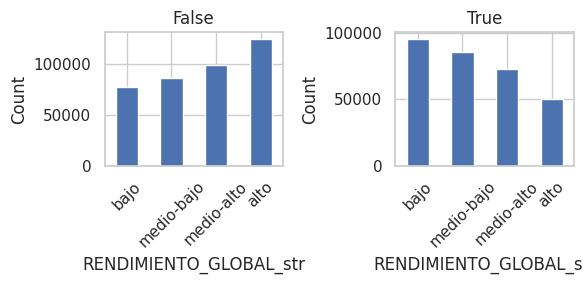

Generating plots for: FAMI_TIENECOMPUTADOR


<Figure size 800x300 with 0 Axes>

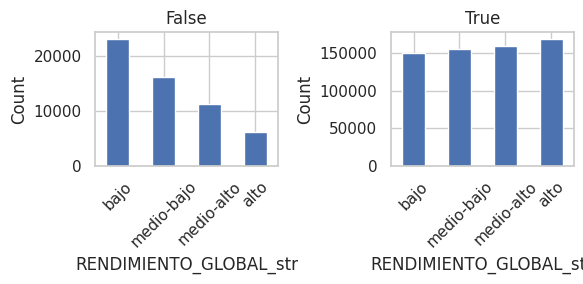

Generating plots for: FAMI_EDUCACIONMADRE


<Figure size 1600x1200 with 0 Axes>

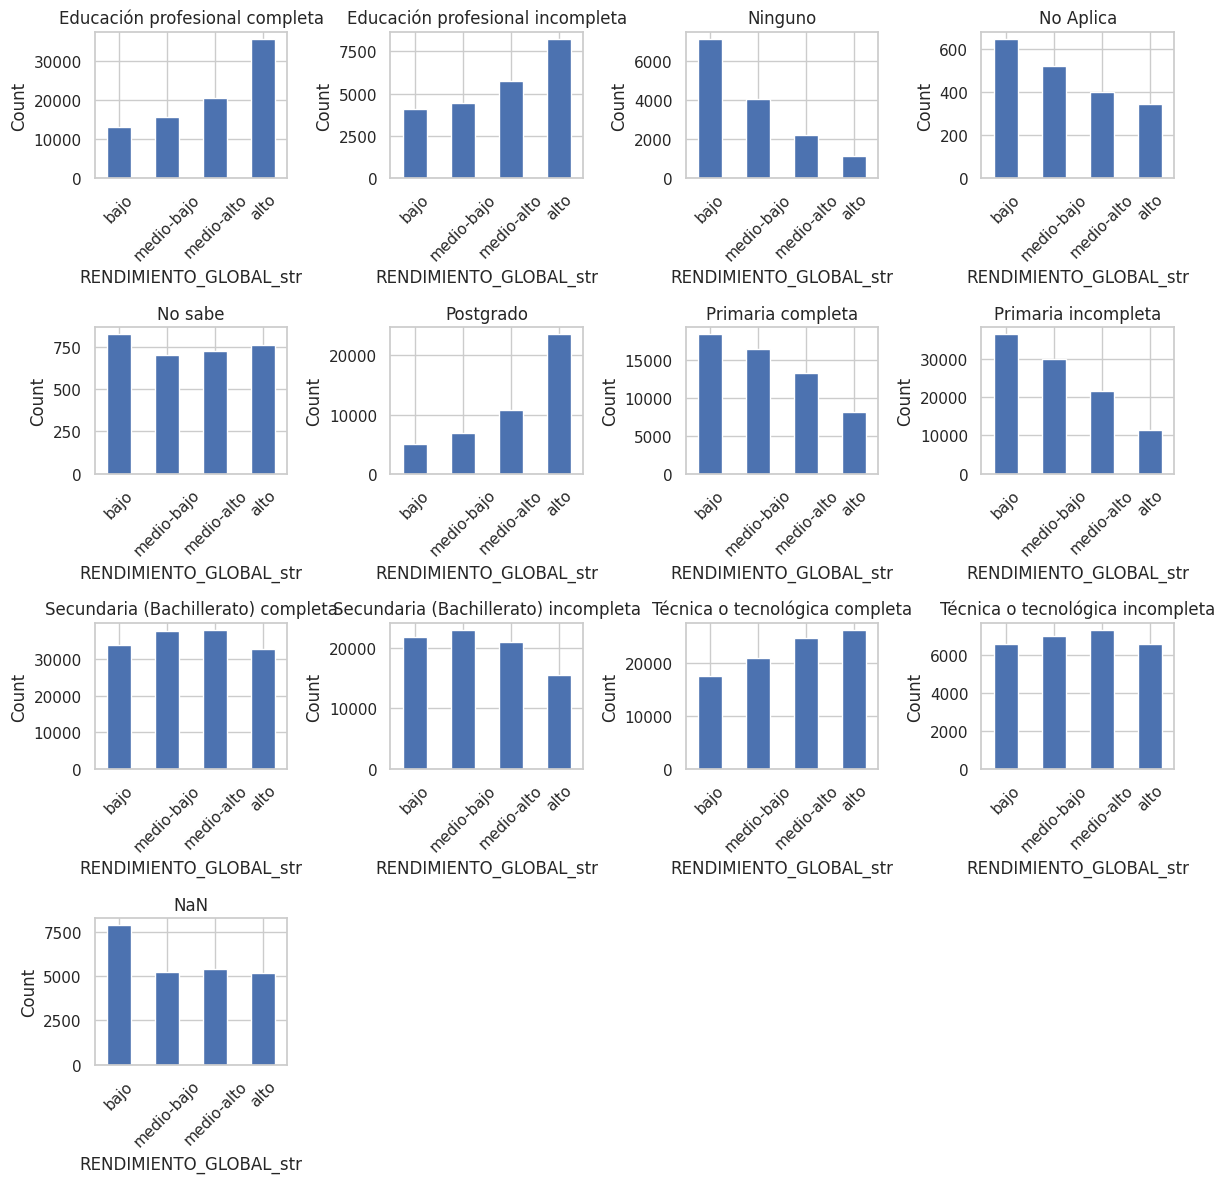

Generating plots for: Entre 1 millón y menos de 2.5 millones


<Figure size 800x300 with 0 Axes>

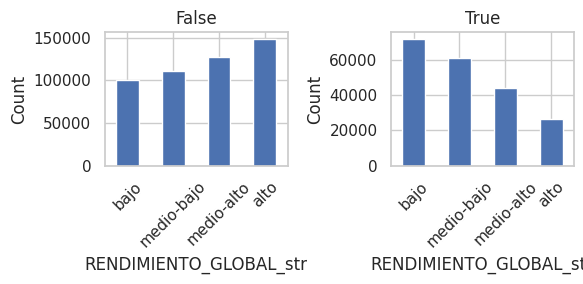

Generating plots for: Entre 2.5 millones y menos de 4 millones


<Figure size 800x300 with 0 Axes>

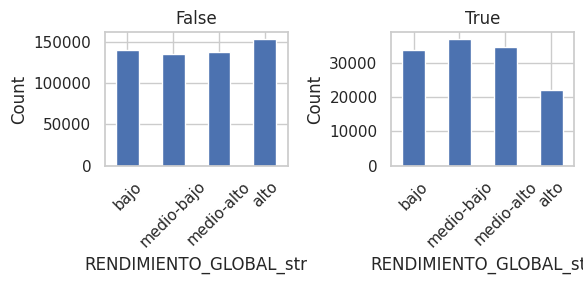

Generating plots for: Entre 4 millones y menos de 5.5 millones


<Figure size 800x300 with 0 Axes>

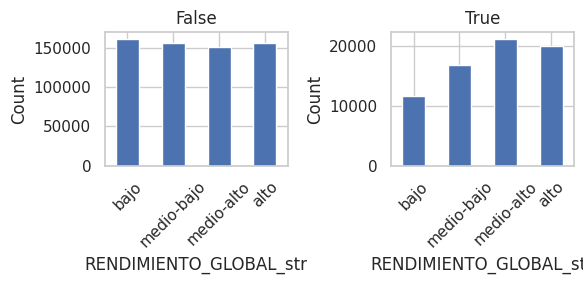

Generating plots for: Entre 5.5 millones y menos de 7 millones


<Figure size 800x300 with 0 Axes>

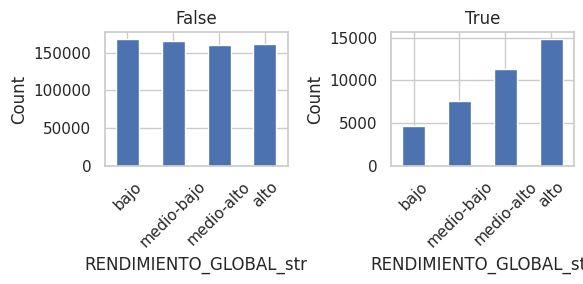

Generating plots for: Entre 500 mil y menos de 1 millón


<Figure size 800x300 with 0 Axes>

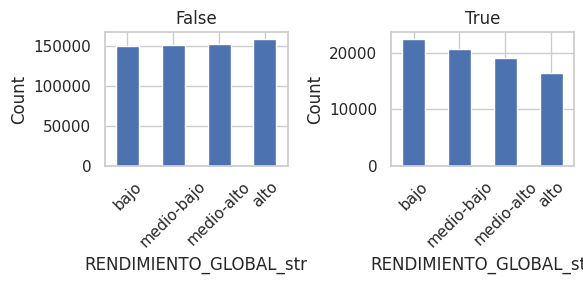

Generating plots for: Menos de 500 mil


<Figure size 800x300 with 0 Axes>

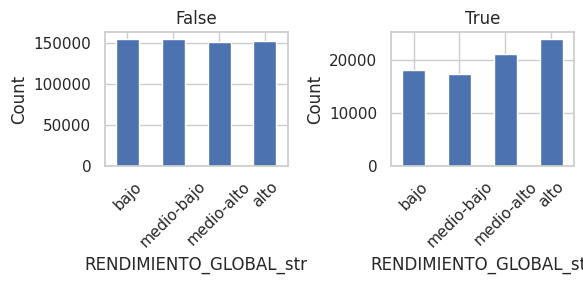

Generating plots for: Más de 7 millones


<Figure size 800x300 with 0 Axes>

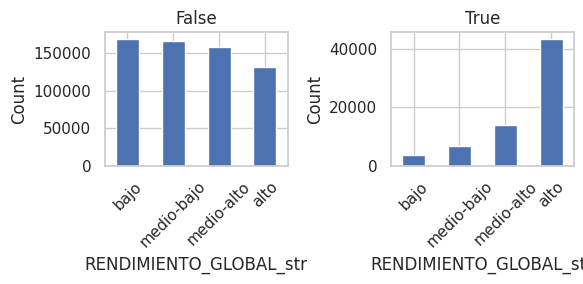

Generating plots for: No pagó matrícula


<Figure size 800x300 with 0 Axes>

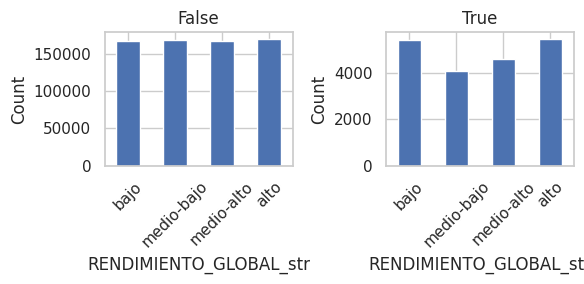

Generating plots for: Horas_Trabajo_0


<Figure size 800x300 with 0 Axes>

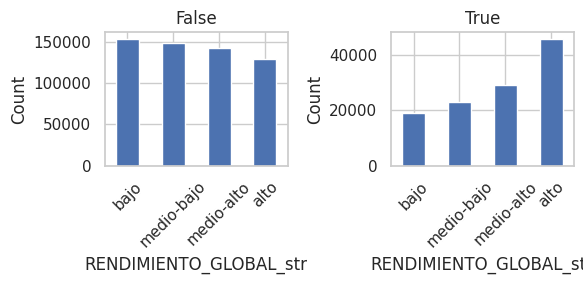

Generating plots for: Horas_Trabajo_Entre 11 y 20 horas


<Figure size 800x300 with 0 Axes>

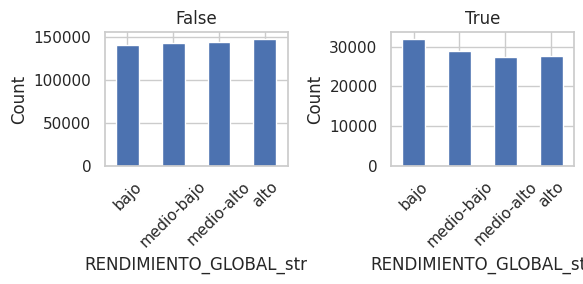

Generating plots for: Horas_Trabajo_Entre 21 y 30 horas


<Figure size 800x300 with 0 Axes>

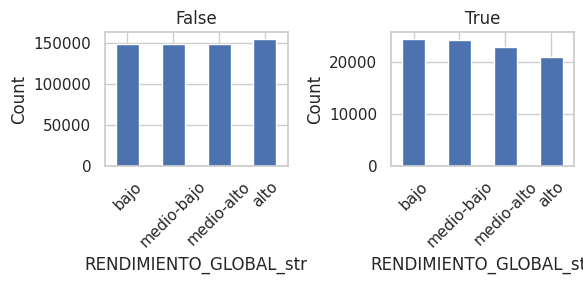

Generating plots for: Horas_Trabajo_Menos de 10 horas


<Figure size 800x300 with 0 Axes>

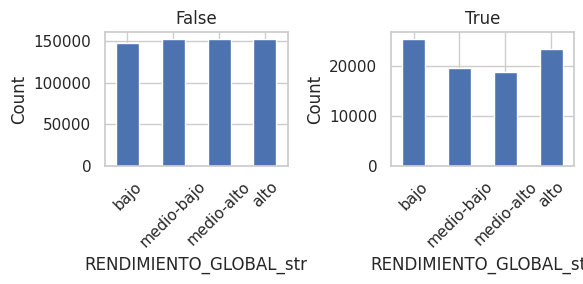

Generating plots for: Horas_Trabajo_Más de 30 horas


<Figure size 800x300 with 0 Axes>

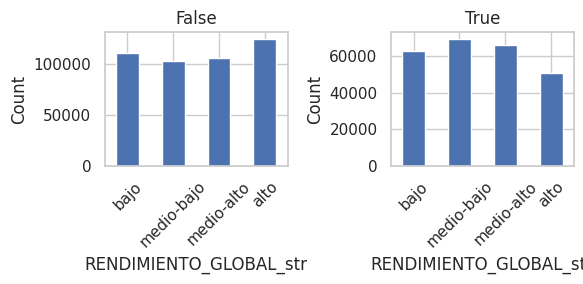

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rlxutils import subplots

# Define el orden de las categorías de rendimiento.
orden_rendimiento = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Mapeado de RENDIMIENTO_GLOBAL en numerico.
mapeo_inverso_rangos = {1: 'bajo', 2: 'medio-bajo', 3: 'medio-alto', 4: 'alto'}
df['RENDIMIENTO_GLOBAL_str'] = df['RENDIMIENTO_GLOBAL'].map(mapeo_inverso_rangos)


# Lista de las columnas a comparar con RENDIMIENTO_GLOBAL
columns_to_plot = [
    'PERIODO',
    'ESTU_PRGM_DEPARTAMENTO',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE',
    'FAMI_TIENELAVADORA',
    'FAMI_TIENEAUTOMOVIL',
    'ESTU_PAGOMATRICULAPROPIO',
    'FAMI_TIENECOMPUTADOR',
    'FAMI_EDUCACIONMADRE',
    # Columnas de matricula one-hot
    'Entre 1 millón y menos de 2.5 millones',
    'Entre 2.5 millones y menos de 4 millones',
    'Entre 4 millones y menos de 5.5 millones',
    'Entre 5.5 millones y menos de 7 millones',
    'Entre 500 mil y menos de 1 millón',
    'Menos de 500 mil',
    'Más de 7 millones',
    'No pagó matrícula',
    # Columnas de horas de trabajo one-hot
    'Horas_Trabajo_0',
    'Horas_Trabajo_Entre 11 y 20 horas',
    'Horas_Trabajo_Entre 21 y 30 horas',
    'Horas_Trabajo_Menos de 10 horas',
    'Horas_Trabajo_Más de 30 horas'
]

sns.set(style='whitegrid')
for col in columns_to_plot:
    if col in df.columns:
        print(f"Generating plots for: {col}")
        unique_values = df[col].fillna('NaN').unique()
        c = sorted(unique_values, key=lambda x: (pd.isna(x) or x == 'NaN', str(x)))
        n_unique = len(c)
        if n_unique == 0:
            print(f"Column '{col}' has no valid values to plot.")
            continue

        n_cols_subplots = min(4, n_unique)

        num_rows = (n_unique + n_cols_subplots - 1) // n_cols_subplots # Calculate needed rows
        plt.figure(figsize=(n_cols_subplots * 4, num_rows * 3)) # Adjust figure size

        for ax, ci in subplots(c, n_cols=n_cols_subplots):
            if ci == 'NaN':
                 zc = df[df[col].isna()]
                 title = 'NaN'
            else:
                zc = df[df[col] == ci]
                title = str(ci)

            if not zc.empty:
                performance_counts = zc['RENDIMIENTO_GLOBAL_str'].value_counts()

                performance_counts_ordered = performance_counts.reindex(orden_rendimiento).fillna(0)

                performance_counts_ordered.plot(kind='bar', ax=ax)

                ax.set_title(title)
                ax.set_ylabel("Count")
                ax.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame 'df'.")

df = df.drop(columns=['RENDIMIENTO_GLOBAL_str'])

Se descartaron todos aquellos que no tengan un impacto alto, si es moderado o no es contundente dentro de una tendencia, es descartado. Lo que sería el departamento de residencia del estudiante no compete por falta de datos y no seguir una tendencia clara al igual que el periodo.

El estrato por su parte genera una tendencia clara que se ve reafirmada con si la familia tiene internet y si la familia tiene computador.

La relevancia de los estudios de la madre y del padre resultaron ser altos con cierta tendencia dependiendo del grado de escolaridad, por lo que vas a ser tenidos en cuenta más no necesariamente usados de la manera en la que se esta actualmente.

Por parte de los one-hot propuestos, se determino que el que mejor puede ser usado es el de matricula, las horas de trabajo no fuerón concluyentes puesto que no seguian ningún tipo de tendencia.

Por ultimo, el hecho de que un estudiante pague la matricula resulto ser determinante puesto que marca una tendencia, sera usado.

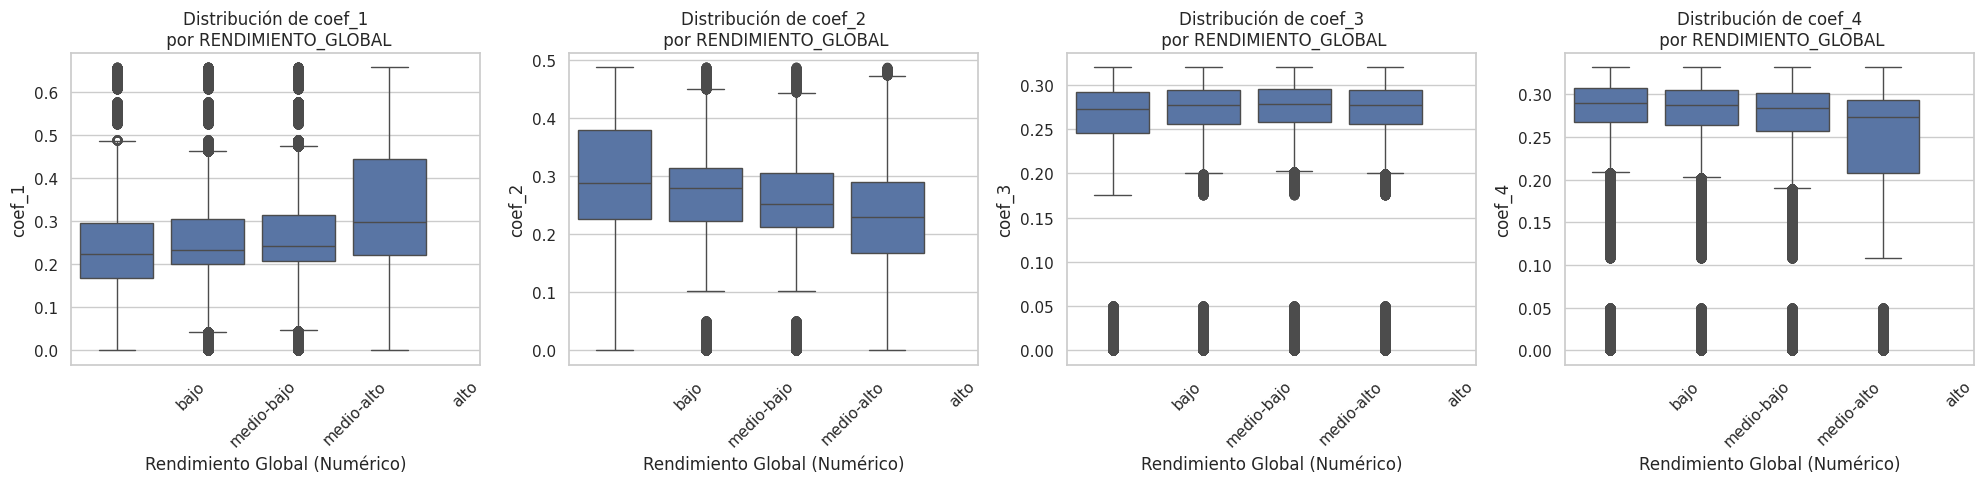

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


orden_rendimiento_numerico = [1, 2, 3, 4]

coef_columns = ['coef_1', 'coef_2', 'coef_3', 'coef_4']

sns.set(style='whitegrid')

num_cols_subplots = len(coef_columns) # One column per coefficient
plt.figure(figsize=(num_cols_subplots * 5, 5)) # Adjust figure size

for i, col in enumerate(coef_columns):
    plt.subplot(1, num_cols_subplots, i + 1) # 1 row, number of coef_columns, current plot index


    sns.boxplot(x='RENDIMIENTO_GLOBAL', y=col, data=df, order=orden_rendimiento_numerico)


    plt.title(f'Distribución de {col}\n por RENDIMIENTO_GLOBAL') # Add newline for better title display
    plt.xlabel('Rendimiento Global (Numérico)') # Update label to reflect numerical values
    plt.ylabel(col)

    mapeo_inverso_rangos = {1: 'bajo', 2: 'medio-bajo', 3: 'medio-alto', 4: 'alto'}
    plt.xticks(ticks=orden_rendimiento_numerico, labels=[mapeo_inverso_rangos[val] for val in orden_rendimiento_numerico], rotation=45, ha='right')


plt.tight_layout()

plt.show()

1. coef_1:
Relación con el rendimiento:

Bajo rendimiento: Mediana alrededor de 0.1.

Alto rendimiento: Mediana cerca de 0.5.

Interpretación:

Este coeficiente está fuertemente asociado al rendimiento. A mayor rendimiento, mayor valor de coef_1.

Posiblemente sea un predictor importante para el rendimiento global.

2. coef_2:
Relación con el rendimiento:

Valores medianos van de ~0.05 (bajo) a ~0.25 (alto).

Interpretación:

Hay una correlación positiva, pero menos fuerte que en coef_1.

Podría ser un factor secundario en el rendimiento.

3. coef_3 y coef_4:
Relación con el rendimiento:

Las medianas se mantienen estables (alrededor de 0.1–0.15) en todos los grupos.

Interpretación:

No hay evidencia de que estos coeficientes estén relacionados con el rendimiento.


In [35]:
from scipy.stats import chi2_contingency
import pandas as pd

programas_unicos = df['ESTU_PRGM_ACADEMICO'].dropna().unique()

# Initialize counters
total_tests = 0
non_significant_tests = 0
alpha = 0.05 # Significance level

print("Calculating percentage of non-significant p-values...")

# Iterate over each unique academic program and perform the test
for programa in programas_unicos:
    # Create sub-DataFrames and counts for the current program and the rest
    df_programa = df[df['ESTU_PRGM_ACADEMICO'] == programa].copy()
    # Note: RENDIMIENTO_GLOBAL is now numerical in df due to cleaning,
    # so value_counts will use those numerical values.
    counts_programa = df_programa['RENDIMIENTO_GLOBAL'].value_counts().sort_index()

    df_resto = df[df['ESTU_PRGM_ACADEMICO'] != programa].copy()
    counts_resto = df_resto['RENDIMIENTO_GLOBAL'].value_counts().sort_index()

    # Get all unique (numerical) performance categories from the cleaned DataFrame
    all_rendimiento_categories = sorted(df['RENDIMIENTO_GLOBAL'].dropna().unique())
    counts_programa = counts_programa.reindex(all_rendimiento_categories, fill_value=0)
    counts_resto = counts_resto.reindex(all_rendimiento_categories, fill_value=0)

    contingency_data = {
        'This Program': counts_programa,
        'Rest of Programs': counts_resto
    }
    contingency_table_single_program = pd.DataFrame(contingency_data).transpose()

    # Ensure the table is valid before testing
    if contingency_table_single_program.shape[0] > 1 and contingency_table_single_program.shape[1] > 1:
        try:
            # Perform the Chi-Squared test
            chi2, p, dof, expected = chi2_contingency(contingency_table_single_program)

            # Increment total tests count
            total_tests += 1

            # Check if the p-value is not significant
            if p >= alpha:
                non_significant_tests += 1

        except ValueError:
            # If there's an error (e.g., invalid table), don't count this as a completed test
            pass # Optional: you could count errors if you wanted

# Calculate the percentage
if total_tests > 0:
    percentage_non_significant = (non_significant_tests / total_tests) * 100
    print(f"\nTotal valid Chi-Squared tests performed: {total_tests}")
    print(f"Number of tests with p-value >= {alpha} (non-significant): {non_significant_tests}")
    print(f"Percentage of non-significant p-values: {percentage_non_significant:.2f}%")
else:
    print("\nNo valid Chi-Squared tests could be performed for any academic program.")

Calculating percentage of non-significant p-values...

Total valid Chi-Squared tests performed: 786
Number of tests with p-value >= 0.05 (non-significant): 203
Percentage of non-significant p-values: 25.83%


Se concluye que hay 25.83% de datos no significativos, por lo que no se desprecian para la evaluación, más no serán de total importancia.